> # Some complex model #

We can build some non-sequential model. Sequential API can't build the models.

### 1. Functional API ###

One example is wide & deep network. If we use this model, the neural network can learn both complex and simple pattern.

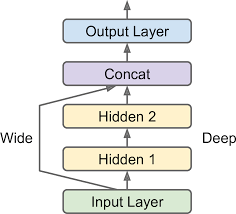

In [ ]:
input_ = keras.layers.Input(shape="input_shape")
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])

Input object can get multiple inputs. Important point is to make a layer and set the layer's input layer(another layer). And through concatenate layer connect input layer and output of second hidden layer.

If we want to send some features through short route and other features through long route, we should use several inputs.

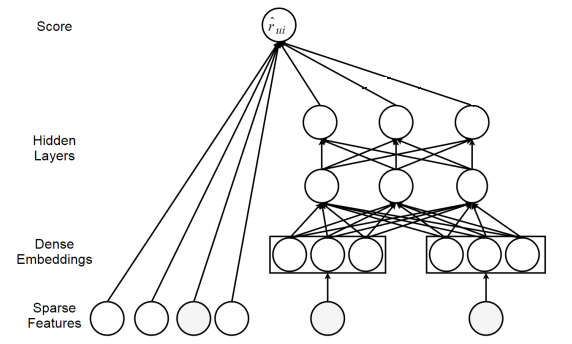

In [ ]:
inputA = keras.layers.Input(shape="inputA", name="wide_input")

inputB = keras.layers.Input(shape="inputB", name="deep_input")
hidden1 = keras.layers.Dense(30, activation='relu')(inputB)
hidden2 = keras.layers.Dense(30, activaiton='relu')(hidden1)

concat = keras.layers.Concatenate()(inputA, hidden2)
output_ = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[inputA, inputB], outputs=[output_])

When we call fit method in this model, we have to send input tuple (not one matix) to input layers. For example **(X_train_A, X_train_B)** not just **X_train**. It's same at validation, test set.

Some problem needs multiple outputs. (ex. Classificating objects in image and find out location of the objects) And when we works several independent tasks in same data, using single network is better to make better performance. Bacause the network can learn useful features during multiple tasks. The other is to use for regularization. Adding sub-output is useful to check whether subnetwork depends on other networks.

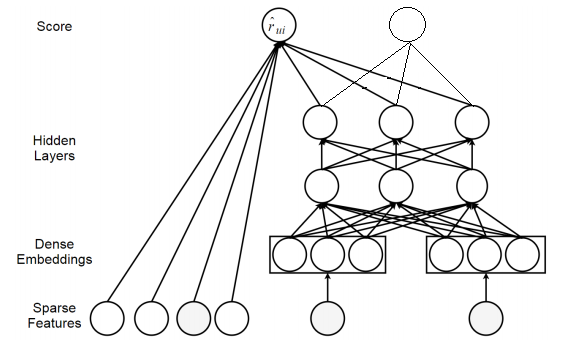

In [ ]:
inputA = keras.layers.Input(shape="inputA", name="wide_input")

inputB = keras.layers.Input(shape="inputB", name="deep_input")
hidden1 = keras.layers.Dense(30, activation='relu')(inputB)
hidden2 = keras.layers.Dense(30, activaiton='relu')(hidden1)

concat = keras.layers.Concatenate()(inputA, hidden2)

output1 = keras.layers.Dense(1, name="main_output")(concat)
output2 = keras.layers.Dense(1, name="sub_output")(hidden2)

model = kears.Model(inputs=[inputA, inputB], outputs=[output1, output2])

Each output need its own loss function. So we have to list of loss in compiling step. If we send one loss, keras recognizes that all loss fuctions are same. Keras adds listed loss and use it at training. If we are interested in main output, we can set more weight at main loss.

In [ ]:
model.compile(loss=["mse"], loss_weights=[0.9, 0.1] ,optimizer="sgd")

In [ ]:
history = model.fit([X_train_A, X_train_B], [y_train_A, y_train_B], epochs=30,
                   validation_data=([X_valid_A, X_valid_B], [y_valid_A, y_valid_B]))

### 2. Subclassing API ###

Sequential and funcional API are declarative. These ways have many advantages. They are easy to copy and share model and good for printing and research model's structure. And so on. But the point that model is static is albe to be a penalty. Some model needs several dynamic structures like includes iteration, handles various scale and has conditionals.

In [ ]:
class WideAndDeep(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.sub_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        sub_output = self.sub_output(hidden2)
        return main_output, sub_output

model = WideAndDeep()

This example doesn't need to make object of input class. High flexibility derives some costs. Structure of model is hide in call method so keras can't analyze it easily. Namely, we can't save and copy model.